In [1]:
%matplotlib inline
import pyaudio

import numpy as np
import matplotlib.pyplot as plt
from IPython import display
import time

In [2]:
p = pyaudio.PyAudio()

CHANNELS = 1
RATE = 44100
buffer_size = 4096 # needed to change this to get undistorted audio


# detect recorder
info = p.get_host_api_info_by_index(0)
numdevices = info.get('deviceCount')

recorder_name = 'Scarlett 2i2 USB'
for i in range(0, numdevices):
    name = p.get_device_info_by_host_api_device_index(0, i).get('name')
    if name == recorder_name:
        recorder_id = i

In [3]:
stream = p.open(
    format=pyaudio.paFloat32,
    channels=CHANNELS,
    rate=RATE,
    input=True,
    input_device_index=recorder_id
)

In [4]:
plt.rcParams['figure.figsize'] = [16, 12]
plt.rcParams.update({'font.size': 18})

In [7]:
dt = 1/buffer_size
t = np.arange(0,1,dt)

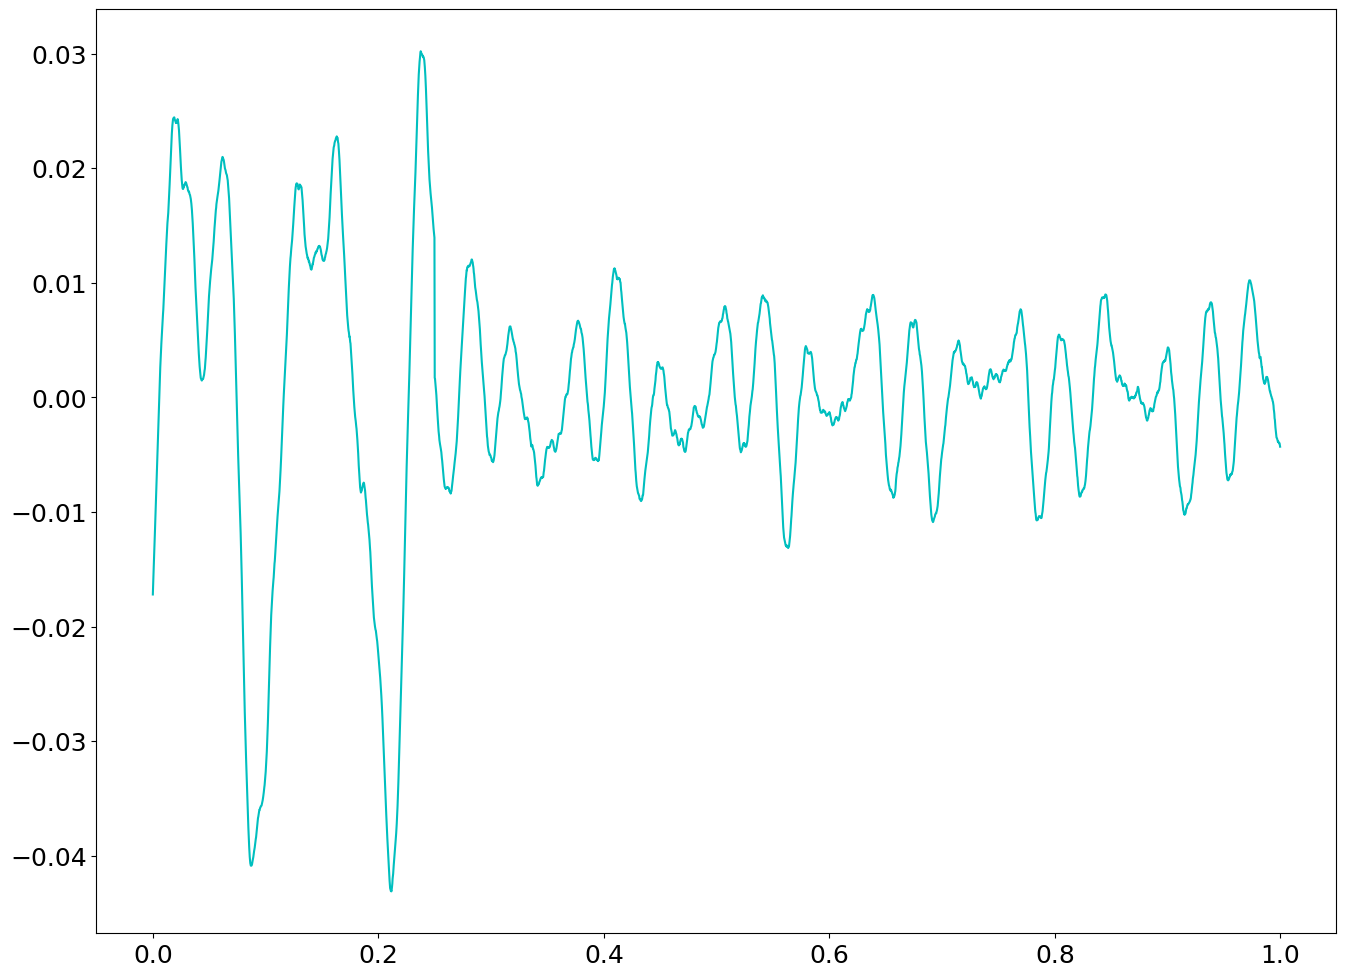

None

low 0.011435714550316334


KeyboardInterrupt: 

In [6]:
low_flag=True


while True:
    audiobuffer = stream.read(buffer_size, exception_on_overflow=False)
    signal = np.frombuffer(audiobuffer, dtype=np.float32)

    if max(signal) > 0.03:
        low_flag=True
        note = signal
        plt.plot(t,signal,color='c')
        display.clear_output(wait=True)
        display.display(plt.show())
        time.sleep(0.2)
    else:
        if low_flag:
            print(f'low {max(signal)}')
            low_flag=False

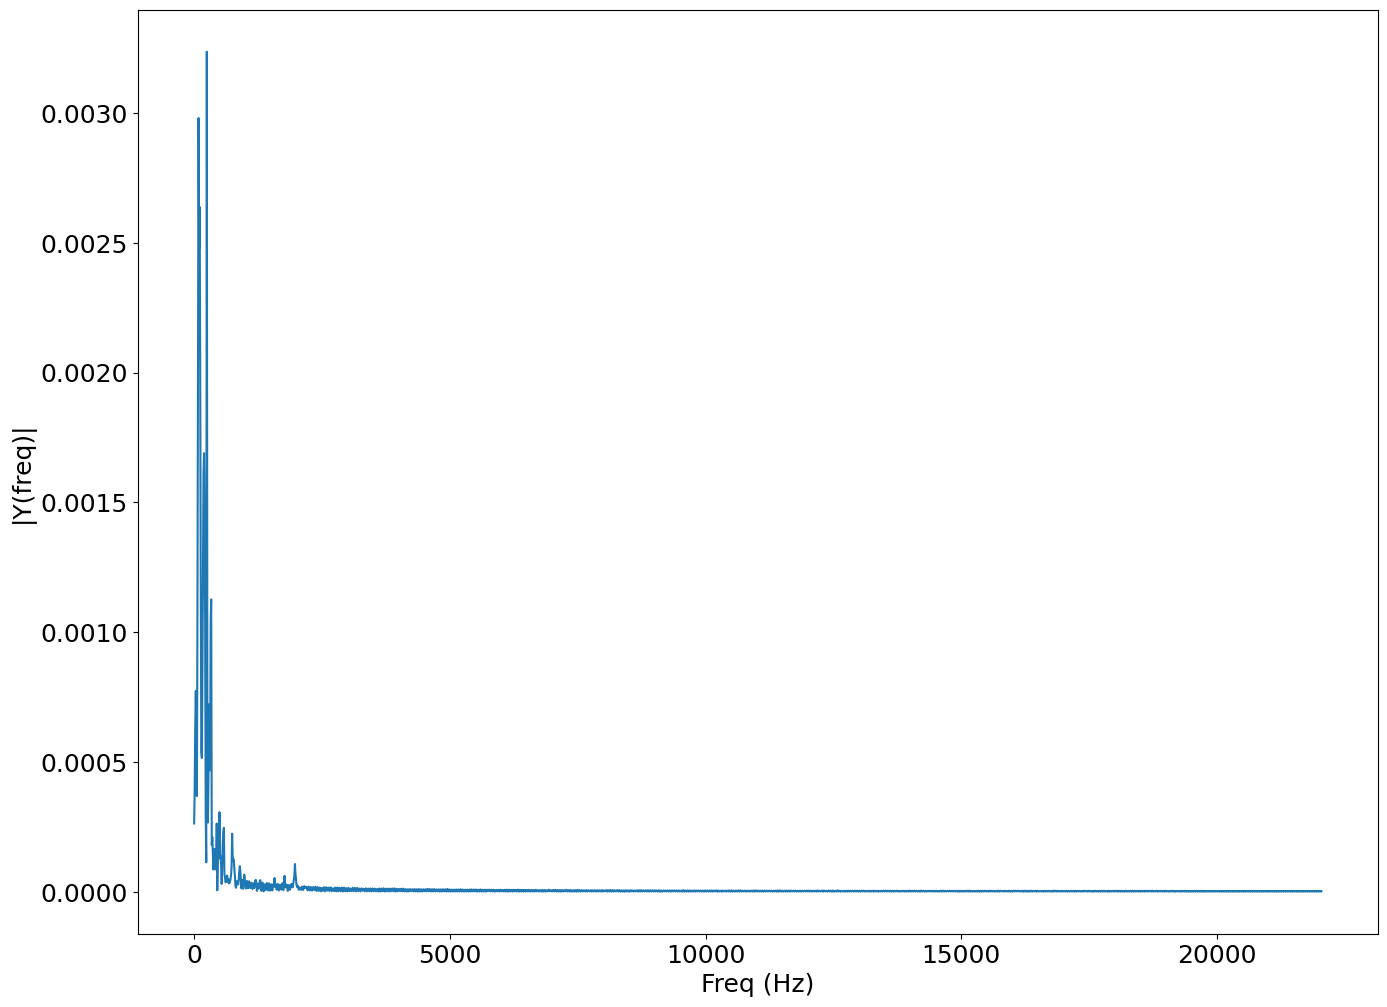

In [8]:
Fs = RATE

n = len(note)
k = np.arange(n)
T = n/Fs

frq = k/T # two sides frequency range
frq = frq[:len(frq)//2] # one side frequency range

Y = np.fft.fft(note)/n # dft and normalization
Y = Y[:n//2]

plt.plot(frq,abs(Y)) # plotting the spectrum
plt.xlabel('Freq (Hz)')
plt.ylabel('|Y(freq)|')
plt.show()

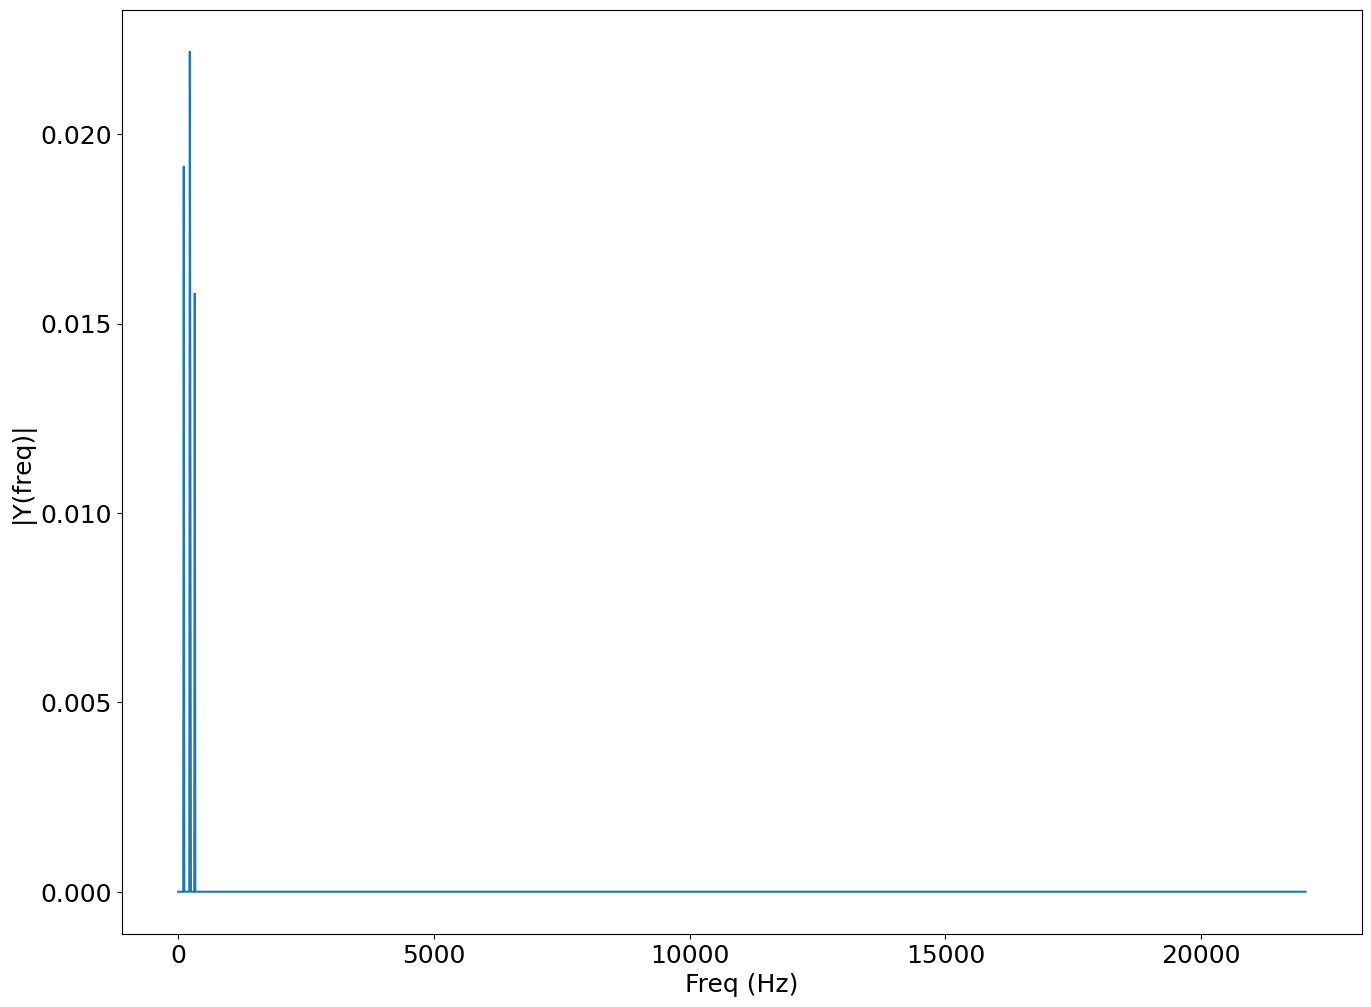

None

[333.7646484375, 322.998046875, 656.7626953125, 656.7626953125, 656.7626953125, 333.7646484375, 290.6982421875, 139.9658203125, 150.732421875, 150.732421875, 290.6982421875, 290.6982421875, 290.6982421875, 290.6982421875, 215.33203125, 226.0986328125]
low 0.003355699125677347


KeyboardInterrupt: 

In [12]:
low_flag=True
min_volume_tolerance = 0.04
frec_volume_tolerance = 0.008
all_frecs = []
while True:
    audiobuffer = stream.read(buffer_size, exception_on_overflow=False)
    signal = np.frombuffer(audiobuffer, dtype=np.float32)

    if max(signal) > min_volume_tolerance:
        low_flag=True
        ## FTT
        Fs = RATE

        n = len(signal)
        k = np.arange(n)
        T = n/Fs
        
        frq = k/T # two sides frequency range
        frq = frq[:len(frq)//2] # one side frequency range
        
        Y = np.fft.fft(signal)/n # dft and normalization
        Y = Y[:n//2]
        indices = Y > frec_volume_tolerance
        Y_clean = Y * indices

        if max(Y_clean) > 0:
            plt.plot(frq,abs(Y_clean)) # plotting the spectrum
            plt.xlabel('Freq (Hz)')
            plt.ylabel('|Y(freq)|')
            display.clear_output(wait=True)
            display.display(plt.show())
            time.sleep(0.2)
            index = Y.argmax(axis=0)
            all_frecs.append(frq[index])
            print(all_frecs)
    else:
        if low_flag:
            print(f'low {max(signal)}')
            low_flag=False